In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.optimize import curve_fit

data = pandas.read_csv('/users/hfwest/GBO-REU/Data/RAMPS_clump_catalog_diss_data.txt', skiprows = 2, sep = '\s+',\
                        names = ['ClumpName', # Identifier
                                 'theta_maj', # Major axis angular size of ellipsoidal fit to clump
                                 'theta_min', # Minor axis angular size of same
                                 'T_rot', # NH3 Rotational temperature
                                 'log10(N_tot,ba)', # Base 10 log of the beam-averaged NH3 column density
                                 'sigma', # Turbulent velocity dispersion
                                 'V_LSR', # Local Standard of Rest velocity
                                 'chi(NH3)',
                                 'd1', # Distance to clump
                                 'p1', # Probability of above distance given by the distance PDF
                                 'M_clump', # Clump mass
                                 'L_clump', # Clump luminosity
                                 'EvolState', # Stellar evolutionary state; Q(uiescent), P(rotostellar), H(II region), PDR (Photodissociation region), U(nknown) 
                                 'FILLER1', 
                                 'FILLER2', 
                                 'FILLER3', 
                                 'T_rot_err', # Error in T_rot
                                 'log10(N_tot,ba)_err', # Error in log10(N_tot,ba)
                                 'sigma_err', # Error in sigma
                                 'V_LSR_err', # Error in V_LSR
                                 'chi(NH3)_err', 
                                 'd1_err', # Error in d1
                                 'FILLER4', 
                                 'M_clump_err', # Error in M_clump
                                 'L_clump_err', # Error in L_clump
                                 'FILLER5'])\
             .drop(columns = ['FILLER1', 'FILLER2', 'FILLER3', 'FILLER4', 'FILLER5'])

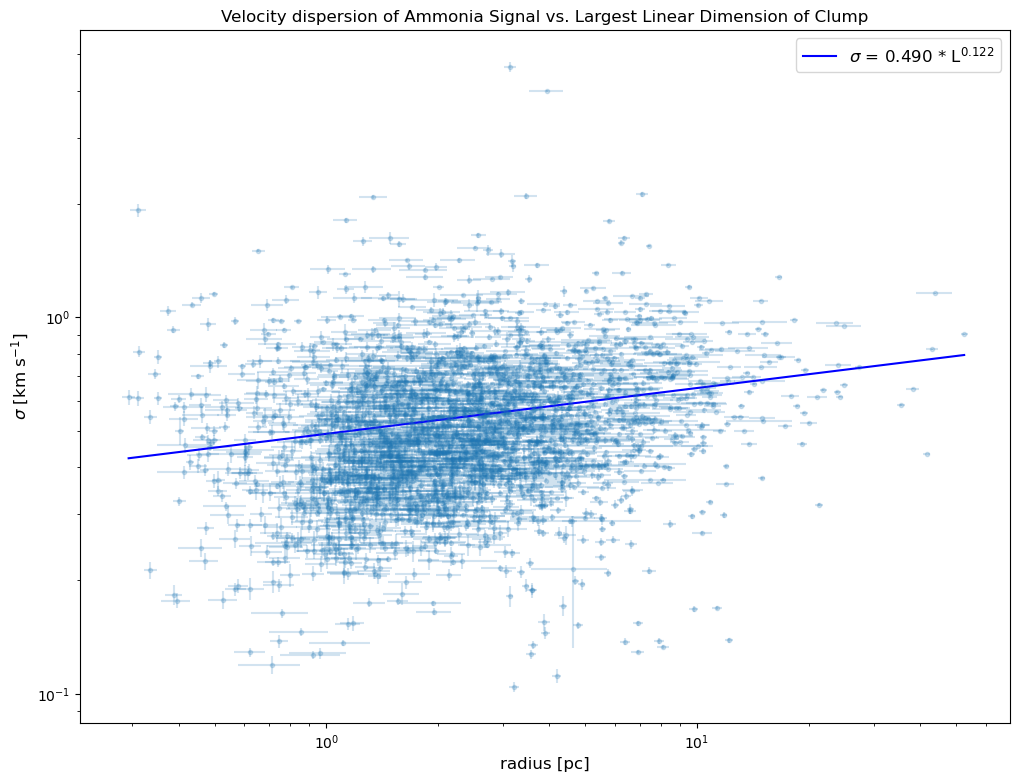

In [2]:
sigma_vals = data['sigma']
sigma_errors = data['sigma_err']
length_vals = data['theta_maj'] * np.pi/(60*180) * data['d1'] * 1000
length_errors = data['theta_maj'] * np.pi/(60*180) * data['d1_err'] * 1000

plt.figure(figsize = (12, 9))

plt.errorbar(x = length_vals, y = sigma_vals, xerr = length_errors, yerr = sigma_errors, 
             fmt = '.', color = 'tab:blue', alpha = .2)

def expoFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(expoFunc, length_vals, sigma_vals)
fit_vals = np.array([min(length_vals), max(length_vals)])
plt.plot(fit_vals, expoFunc(fit_vals, *popt), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt), color = 'blue')

plt.legend(fontsize = 12)
plt.xlabel('radius [pc]', fontsize = 12)
plt.ylabel('$\sigma$ [km s$^{-1}$]', fontsize = 12)
plt.xscale('log')
plt.yscale('log')
plt.title('Velocity dispersion of Ammonia Signal vs. Largest Linear Dimension of Clump', fontsize = 12)

plt.savefig('/users/hfwest/GBO-REU/Plots/ammonia_v-disp_area.png')

plt.show()

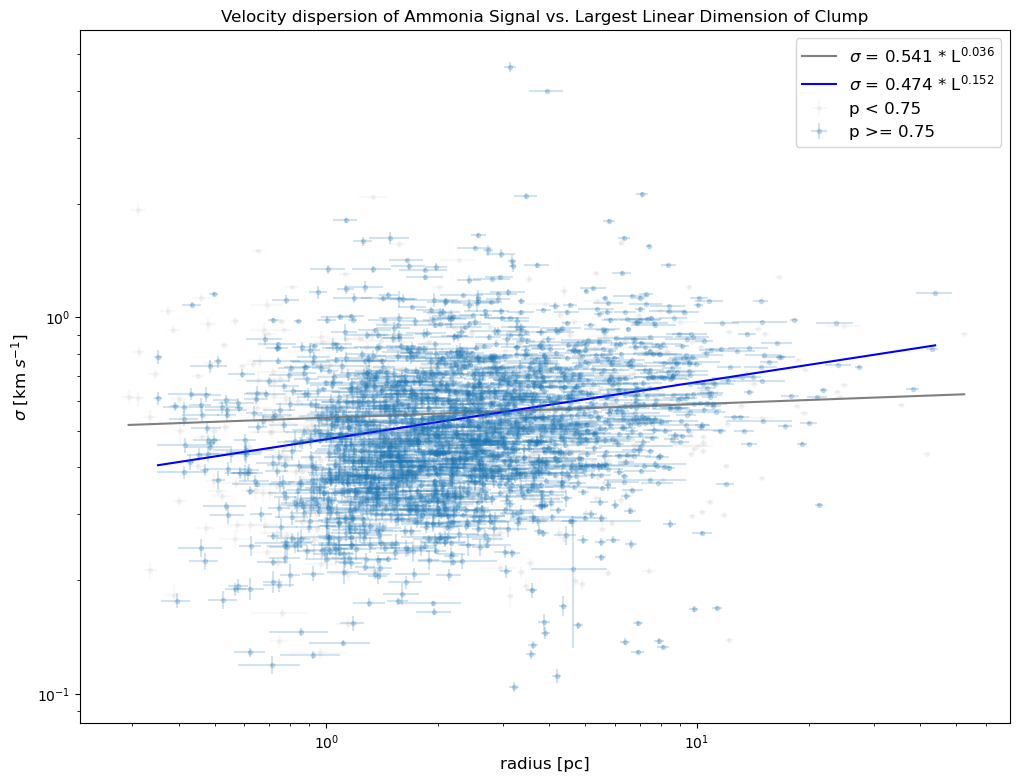

In [3]:
# Select for high P(distance)

low_p_lens = data['theta_maj'][data['p1'] < 0.5] * np.pi/(60*180) * data['d1'][data['p1'] < 0.5] * 1000
low_p_lens_err = data['theta_maj'][data['p1'] < 0.5] * np.pi/(60*180) * data['d1_err'][data['p1'] < 0.5] * 1000

high_p_lens = data['theta_maj'][data['p1'] >= 0.5] * np.pi/(60*180) * data['d1'][data['p1'] >= 0.5] * 1000
high_p_lens_err = data['theta_maj'][data['p1'] >= 0.5] * np.pi/(60*180) * data['d1_err'][data['p1'] >= 0.5] * 1000

low_p_sigma = data['sigma'][data['p1'] < 0.5]
low_p_sigma_err = data['sigma_err'][data['p1'] < 0.5]

high_p_sigma = data['sigma'][data['p1'] >= 0.5]
high_p_sigma_err = data['sigma_err'][data['p1'] >= 0.5]

# print(len(low_p_lens))
# print(len(high_p_lens))

plt.figure(figsize = (12, 9))

plt.errorbar(x = low_p_lens, y = low_p_sigma, xerr = low_p_lens_err, yerr = low_p_sigma_err,
             fmt = '.', color = 'gray', alpha = .05, label = 'p < 0.75')
plt.errorbar(x = high_p_lens, y = high_p_sigma, xerr = high_p_lens_err, yerr = high_p_sigma_err,
             fmt = '.', color = 'tab:blue', alpha = .2, label = 'p >= 0.75')

def expoFunc(x, a, b):
    return a * np.power(x, b)
popt1, pcov1 = curve_fit(expoFunc, low_p_lens, low_p_sigma)
popt2, pcov2 = curve_fit(expoFunc, high_p_lens, high_p_sigma)
fit_vals1 = np.array([min(low_p_lens), max(low_p_lens)])
fit_vals2 = np.array([min(high_p_lens), max(high_p_lens)])
plt.plot(fit_vals1, expoFunc(fit_vals1, *popt1), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt1), color = 'gray')
plt.plot(fit_vals2, expoFunc(fit_vals2, *popt2), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt2), color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 12)
plt.title('Velocity dispersion of Ammonia Signal vs. Largest Linear Dimension of Clump', fontsize = 12)
plt.xlabel('radius [pc]', fontsize = 12)
plt.ylabel('$\sigma$ [km $s^{-1}$]', fontsize = 12)

plt.savefig('/users/hfwest/GBO-REU/Plots/ammonia_per_P-distance.png')

plt.show()

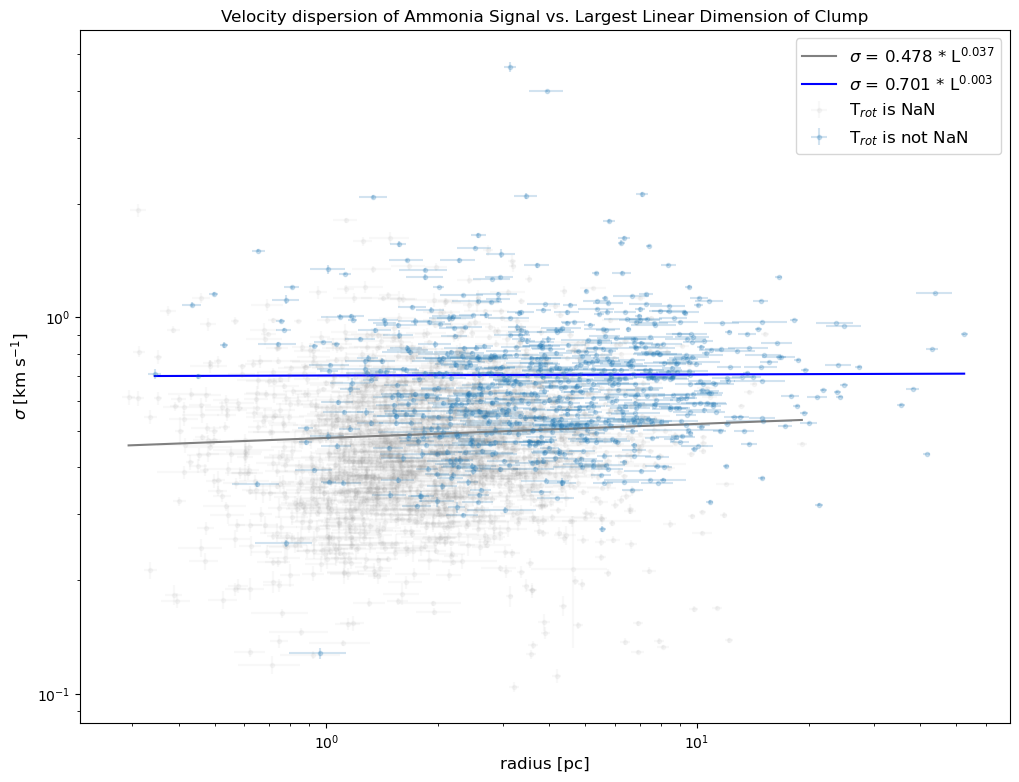

In [4]:
# Select for non-NaN T_rot
non_nan_lens = data['theta_maj'][~data['T_rot'].isna()] * np.pi/(60*180) * data['d1'][~data['T_rot'].isna()] * 1000
non_nan_lens_err = data['theta_maj'][~data['T_rot'].isna()] * np.pi/(60*180) * data['d1_err'][~data['T_rot'].isna()] * 1000
non_nan_sigma = data['sigma'][~data['T_rot'].isna()]
non_nan_sigma_err = data['sigma_err'][~data['T_rot'].isna()]

isnan_lens = data['theta_maj'][data['T_rot'].isna()] * np.pi/(60*180) * data['d1'][data['T_rot'].isna()] * 1000
isnan_lens_err = data['theta_maj'][data['T_rot'].isna()] * np.pi/(60*180) * data['d1_err'][data['T_rot'].isna()] * 1000
isnan_sigma = data['sigma'][data['T_rot'].isna()]
isnan_sigma_err = data['sigma_err'][data['T_rot'].isna()]

plt.figure(figsize = (12, 9))

plt.errorbar(x = isnan_lens, y = isnan_sigma, xerr = isnan_lens_err, yerr = isnan_sigma_err,
             fmt = '.', color = 'gray', alpha = .05, label = 'T$_{rot}$ is NaN')
plt.errorbar(x = non_nan_lens, y = non_nan_sigma, xerr = non_nan_lens_err, yerr = non_nan_sigma_err,
             fmt = '.', color = 'tab:blue', alpha = .2, label = 'T$_{rot}$ is not NaN')

def expoFunc(x, a, b):
    return a * np.power(x, b)
popt1, pcov1 = curve_fit(expoFunc, non_nan_lens, non_nan_sigma)
popt2, pcov2 = curve_fit(expoFunc, isnan_lens, isnan_sigma)
fit_vals1 = np.array([min(non_nan_lens), max(non_nan_lens)])
fit_vals2 = np.array([min(isnan_lens), max(isnan_lens)])
plt.plot(fit_vals2, expoFunc(fit_vals2, *popt2), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt2), color = 'gray')
plt.plot(fit_vals1, expoFunc(fit_vals1, *popt1), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt1), color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 12)
plt.xlabel('radius [pc]', fontsize = 12)
plt.ylabel('$\sigma$ [km s$^{-1}$]', fontsize = 12)
plt.title('Velocity dispersion of Ammonia Signal vs. Largest Linear Dimension of Clump', fontsize = 12)

plt.savefig('/users/hfwest/GBO-REU/Plots/ammonia_per_T-rot.png')

plt.show()

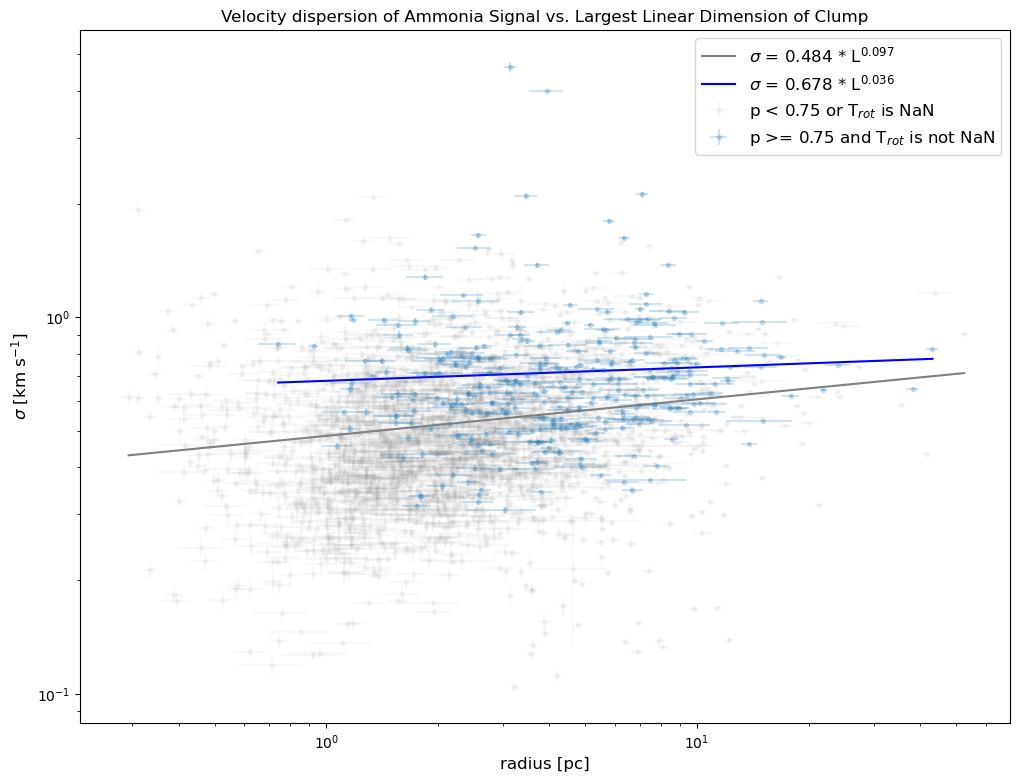

In [5]:
# Selecting for both high P(distance) and non-NaN T_rot simultaneously

high_p_non_nan_lens = data['theta_maj'][data['p1'] >= 0.75][~data['T_rot'].isna()] * np.pi/(60*180) * data['d1'][data['p1'] >= 0.75][~data['T_rot'].isna()] * 1000
high_p_non_nan_lens_err = data['theta_maj'][data['p1'] >= 0.75][~data['T_rot'].isna()] * np.pi/(60*180) * data['d1_err'][data['p1'] >= 0.75][~data['T_rot'].isna()] * 1000
high_p_non_nan_sigma = data['sigma'][data['p1'] >= 0.75][~data['T_rot'].isna()]
high_p_non_nan_sigma_err = data['sigma_err'][data['p1'] >= 0.75][~data['T_rot'].isna()]

low_p_or_nan_lens = data['theta_maj'][(data['p1'] < 0.75) | (data['T_rot'].isna())] * np.pi/(60*180) * data['d1'][(data['p1'] < 0.75) | (data['T_rot'].isna())] * 1000
low_p_or_nan_lens_err = data['theta_maj'][(data['p1'] < 0.75) | (data['T_rot'].isna())] * np.pi/(60*180) * data['d1_err'][(data['p1'] < 0.75) | (data['T_rot'].isna())] * 1000
low_p_or_nan_sigma = data['sigma'][(data['p1'] < 0.75) | (data['T_rot'].isna())]
low_p_or_nan_sigma_err = data['sigma_err'][(data['p1'] < 0.75) | (data['T_rot'].isna())]

plt.figure(figsize = (12, 9))

plt.errorbar(x = low_p_or_nan_lens, y = low_p_or_nan_sigma, xerr = low_p_or_nan_lens_err, yerr = low_p_or_nan_sigma_err,
             fmt = '.', color = 'gray', alpha = .05, label = 'p < 0.75 or T$_{rot}$ is NaN')
plt.errorbar(x = high_p_non_nan_lens, y = high_p_non_nan_sigma, xerr = high_p_non_nan_lens_err, yerr = high_p_non_nan_sigma_err,
             fmt = '.', color = 'tab:blue', alpha = .2, label = 'p >= 0.75 and T$_{rot}$ is not NaN')

def expoFunc(x, a, b):
    return a * np.power(x, b)
popt1, pcov1 = curve_fit(expoFunc, high_p_non_nan_lens, high_p_non_nan_sigma)
popt2, pcov2 = curve_fit(expoFunc, low_p_or_nan_lens, low_p_or_nan_sigma)
fit_vals1 = np.array([min(high_p_non_nan_lens), max(high_p_non_nan_lens)])
fit_vals2 = np.array([min(low_p_or_nan_lens), max(low_p_or_nan_lens)])

plt.plot(fit_vals2, expoFunc(fit_vals2, *popt2), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt2), color = 'gray')
plt.plot(fit_vals1, expoFunc(fit_vals1, *popt1), label = '$\sigma$ = %.3f * L$^{%.3f}$' % tuple(popt1), color = 'blue')

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 12)
plt.xlabel('radius [pc]', fontsize = 12)
plt.ylabel('$\sigma$ [km s$^{-1}$]', fontsize = 12)
plt.title('Velocity dispersion of Ammonia Signal vs. Largest Linear Dimension of Clump', fontsize = 12)

plt.savefig('/users/hfwest/GBO-REU/Plots/ammonia_per-p-and-NaN.png')

plt.show()

In [6]:
print(len(data['M_clump'][data['M_clump'] < .1]))                   # number of clumps omitted from previous frame by setting xlim > 0.1
print(len(data['M_clump'][data['M_clump'] < data['M_clump_err']]))  # number of clumps omitted from previous frame by setting error to be less than mass

15
7


<Figure size 1200x900 with 0 Axes>

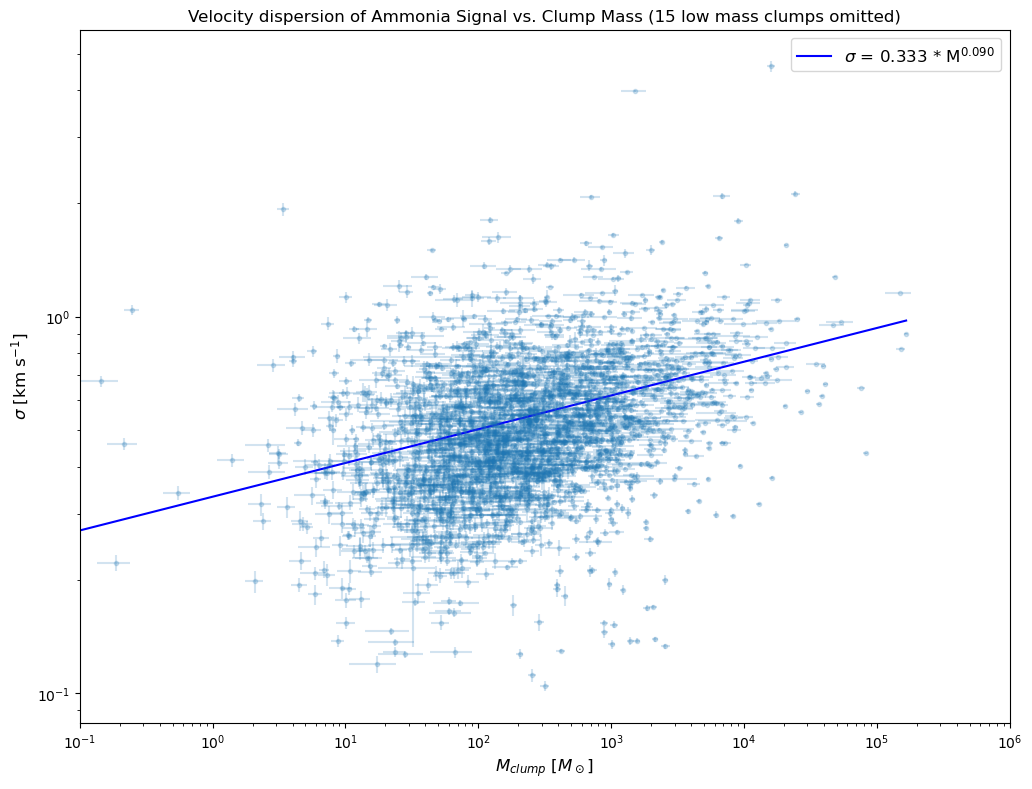

In [7]:
# Excluding values for which error is greater than mass, which had huge horizontal error bars
all_masses = data['M_clump'][data['M_clump_err'] < data['M_clump']]
all_masses_err = data['M_clump_err'][data['M_clump_err'] < data['M_clump']]
all_sigmas = data['sigma'][data['M_clump_err'] < data['M_clump']]
all_sigmas_err = data['sigma_err'][data['M_clump_err'] < data['M_clump']]

plt.figure(figsize = (12, 9))

plt.figure(figsize = (12, 9))
plt.errorbar(x = all_masses, y = all_sigmas, xerr = all_masses_err, yerr = all_sigmas_err,
             fmt = '.', color = 'tab:blue', alpha = .2)
             
def expoFunc(x, a, b):
    return a * np.power(x, b)
popt1, pcov1 = curve_fit(f = expoFunc, xdata = all_masses, ydata = all_sigmas)
fit_vals1 = np.array([min(all_masses), max(all_masses)])
plt.plot(fit_vals1, expoFunc(fit_vals1, *popt1), label = '$\sigma$ = %.3f * M$^{%.3f}$' % tuple(popt1), color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 12)
plt.xlabel('$M_{clump}$ [$M_\odot$]', fontsize = 12)
plt.ylabel('$\sigma$ [km s$^{-1}$]', fontsize = 12)
plt.title('Velocity dispersion of Ammonia Signal vs. Clump Mass (15 low mass clumps omitted)', fontsize = 12)

# plt.savefig('ammonia_v-disp_mass.png')

plt.xlim(.1, 1e6)
plt.savefig('/users/hfwest/GBO-REU/Plots/ammonia_v-disp_mass_centered.png')

plt.show()